In [1]:
#### Import required packages
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 4)
plt.rcParams.update({"axes.grid" : True})

In [2]:
#### Read in data and inspect the first 5 records.
data = pd.read_csv('./Data/Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Income,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#### Checking shape of dataset
print(f'shape of dataset {data.shape}')

shape of dataset (200, 5)


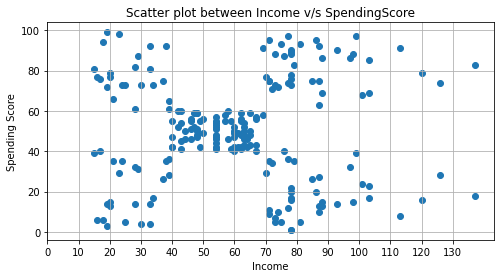

In [4]:
#### Scatter plot between Income v/s SpendingScore
plt.title('Scatter plot between Income v/s SpendingScore')
plt.scatter(data['Income'], data['SpendingScore'])
plt.xticks(list(range(0, max(data['Income']), 10)))
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.show()

# K-Means Clustering
- Plot the graph of k (number of clusters) vs SSE.
- SSE is sum of squared distances of data points to their closest cluster center.
- choose appropriate k where error is minimum or significantly not reducing further. 

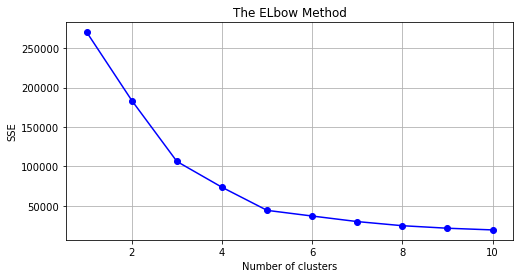

In [5]:
#### Using the elbow method to find the optimal number of clusters
X = data.iloc[:, [3, 4]].values
Sum_of_squared_distances = []
for i in range(1, 11):
    km = KMeans(n_clusters = i)
    km.fit(X)
    Sum_of_squared_distances.append(km.inertia_) 
plt.plot(range(1, 11), Sum_of_squared_distances, '-bo')
plt.title('The ELbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In the plot above the elbow is at k=5 indicating the optimal k for this dataset is 5

In [6]:
#### Fitting Kmeans Clustering with k=5
km = KMeans(n_clusters = 5)
y_kmeans = km.fit_predict(X)
print("Cluster Centers :\n", km.cluster_centers_)
print("SSE :", km.inertia_)

Cluster Centers :
 [[25.72727273 79.36363636]
 [88.2        17.11428571]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]
 [55.2962963  49.51851852]]
SSE : 44448.45544793369


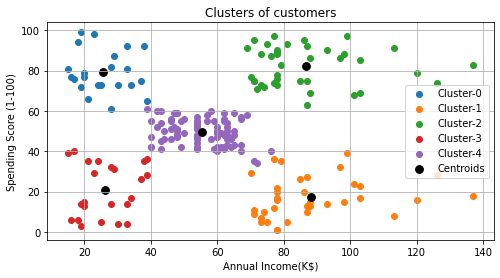

In [7]:
#### Visualising the clusers
for i in range(0,5):
    plt.scatter(X[y_kmeans == i, 0],X[y_kmeans == i, 1], label = 'Cluster-'+str(i))
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 60, c = 'Black', label = 'Centroids')
plt.legend()
plt.title('Clusters of customers')
plt.xlabel('Annual Income(K$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [8]:
data['target'] = list(y_kmeans)
data.head(5)

,CustomerID,Genre,Age,Income,SpendingScore,target
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3


In [9]:
data.to_csv('./Data/Mall_Customers_KMeans_5clusters.csv')

# Hierarchical Clustering
Linkage Methods:
- "ward" minimizes the variance of the clusters being merged.
- "average" uses the average of the distances of each observation of the two sets.
- "complete" or maximum linkage uses the maximum distances between all observations of the two sets.
- "single" uses the minimum of the distances between all observations of the two sets.

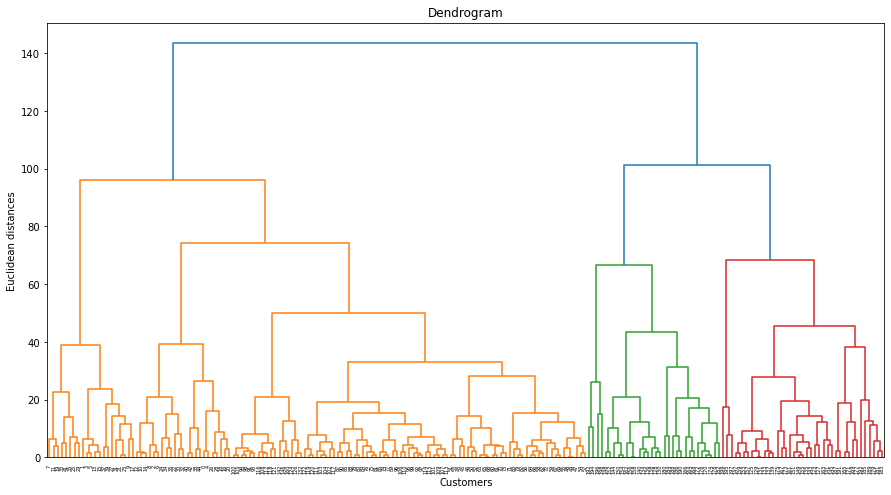

In [10]:
#### Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,8))
dendrogram=sch.dendrogram(sch.linkage(X,method='complete'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.grid(False)
plt.show()

In [11]:
#### Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',
                          linkage='complete')
y_hc=hc.fit_predict(X)

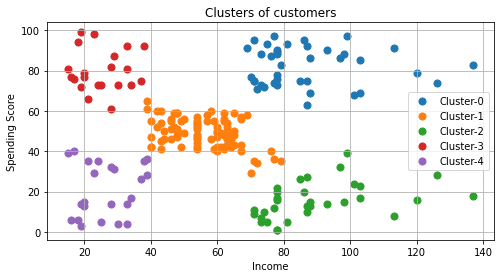

In [12]:
#### Visualising the clusters
for i in range(0,5):
    plt.scatter(X[y_hc==i,0],X[y_hc==i,1],s=50,label='Cluster-'+str(i))
    
plt.title('Clusters of customers')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [13]:
data['target']=list(y_hc)
data.head(5)

,CustomerID,Genre,Age,Income,SpendingScore,target
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [14]:
data.to_csv('./Data/Mall_Customers_Hierarchical_5clusters.csv')